<h1>
<font color="#ff2e2e">
Panorama with OpenCV
</font>
</h1>

In [20]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import os

<h3><font color = "#079e05"> Read input images from 1 to 8 and show them in a row together </font></h3>

In [21]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

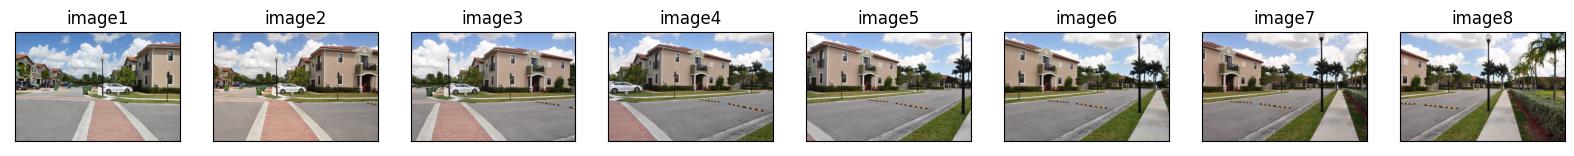

In [22]:
# Read the images
images = [cv2.imread(file) for file in glob.glob("images/Q2/*.jpg")]
# cv2.cvtColor(image, cv2.COLOR_BGR2RGB) to all images
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]


# show the images
plotter([(image, 'image{}'.format(i + 1), 'img') for i, image in enumerate(images)], 1, 8, False, 20, 10, 'Q2_1')

<h3><font color = "#079e05"> Initialize OpenCV's image sticher object and then perform the image stitching on input images </font></h3>

In [23]:
# Create OpenCV stitcher object
stitcher = cv2.createStitcher() if cv2.__version__.startswith('3') else cv2.Stitcher_create()

# Perform image stitching
status, stitched_image = stitcher.stitch(images)

<h3><font color = "#079e05"> Show the result </font></h3>

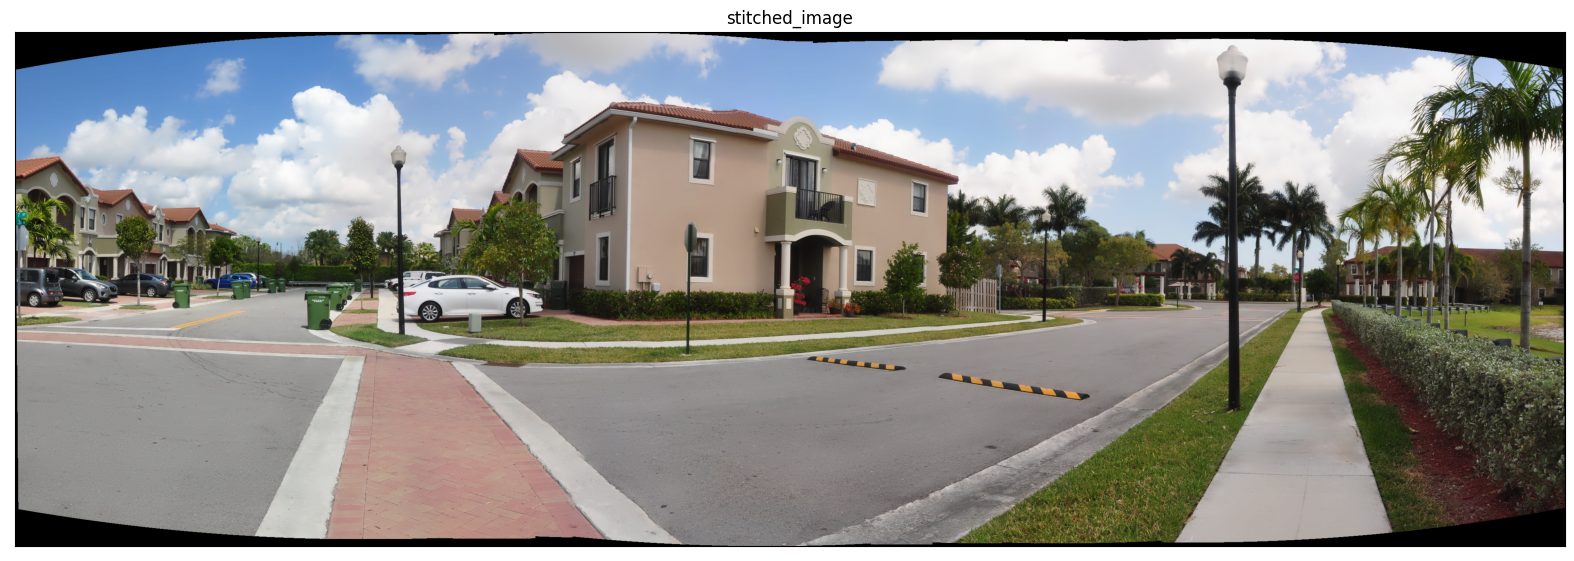

In [25]:
# Check if stitching was successful
if status == cv2.STITCHER_OK:
    # Display stitched image
    plotter([(stitched_image, 'stitched_image', 'img')], 1, 1, False, 20, 10, 'Q2_2')
else:
    print("Stitching failed ({})".format(status))